In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from dmba import textDecisionTree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # Create the parameter grid based on the results of random search 
%matplotlib inline 
# tells VS Code to display plots inside the interface

In [30]:
#EDA

# Your main dataset
spotify_df = pd.read_csv("spotify_2023_peak_cleaned.csv")

# Identify problematic rows
invalid_streams = spotify_df[~spotify_df['streams'].str.replace(',', '').str.isnumeric()]
print(invalid_streams[['track_name', 'streams']])


                              track_name  \
574  Love Grows (Where My Rosemary Goes)   

                                               streams  
574  BPM110KeyAModeMajorDanceability53Valence75Ener...  


In [ ]:
# Convert cleaned string to int (remove commas if any)
for col in ['streams', 'in_deezer_playlists', 'in_shazam_charts']:
    spotify_df[col] = spotify_df[col].astype(str).str.replace(',', '').str.replace('–', '0')
    spotify_df[col] = pd.to_numeric(spotify_df[col], errors='coerce').fillna(0).astype(int)

In [31]:
spotify_df.info()

spotify_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    object 
 14  bpm                   953 non-null    int64  
 15  key                   8

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,charted_billboard,days_to_peak
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,0.551941,1548.211962
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,0.497556,3922.309893
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,0.000000,46.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,1.000000,296.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,1.000000,842.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,1.000000,29935.000000


In [34]:
# Drop the problematic row by index
spotify_df = spotify_df.drop(index=574).reset_index(drop=True)

In [36]:
# Convert cleaned string to int (remove commas if any)
for col in ['streams', 'in_deezer_playlists', 'in_shazam_charts']:
    spotify_df[col] = spotify_df[col].astype(str).str.replace(',', '').str.replace('–', '0')
    spotify_df[col] = pd.to_numeric(spotify_df[col], errors='coerce').fillna(0).astype(int)

In [37]:
spotify_df['streams'] = spotify_df['streams'].fillna(0).astype(int)
spotify_df['in_deezer_playlists'] = spotify_df['in_deezer_playlists'].fillna(0).astype(int)
spotify_df['in_shazam_charts'] = spotify_df['in_shazam_charts'].fillna(0).astype(int)


<Axes: xlabel='charted_billboard', ylabel='count'>

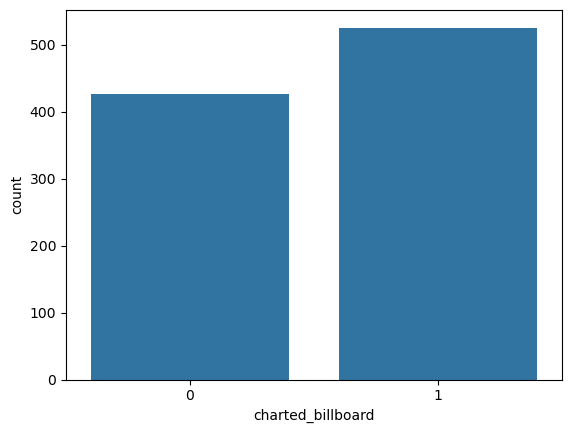

In [2]:

sns.countplot(x='charted_billboard',data=spotify_df) # frequency of categories in the target variable


array([[<Axes: title={'center': 'artist_count'}>,
        <Axes: title={'center': 'released_year'}>,
        <Axes: title={'center': 'released_month'}>,
        <Axes: title={'center': 'released_day'}>,
        <Axes: title={'center': 'in_spotify_playlists'}>],
       [<Axes: title={'center': 'in_spotify_charts'}>,
        <Axes: title={'center': 'streams'}>,
        <Axes: title={'center': 'in_apple_playlists'}>,
        <Axes: title={'center': 'in_apple_charts'}>,
        <Axes: title={'center': 'in_deezer_playlists'}>],
       [<Axes: title={'center': 'in_deezer_charts'}>,
        <Axes: title={'center': 'in_shazam_charts'}>,
        <Axes: title={'center': 'bpm'}>,
        <Axes: title={'center': 'danceability_%'}>,
        <Axes: title={'center': 'valence_%'}>],
       [<Axes: title={'center': 'energy_%'}>,
        <Axes: title={'center': 'acousticness_%'}>,
        <Axes: title={'center': 'instrumentalness_%'}>,
        <Axes: title={'center': 'liveness_%'}>,
        <Axes: title

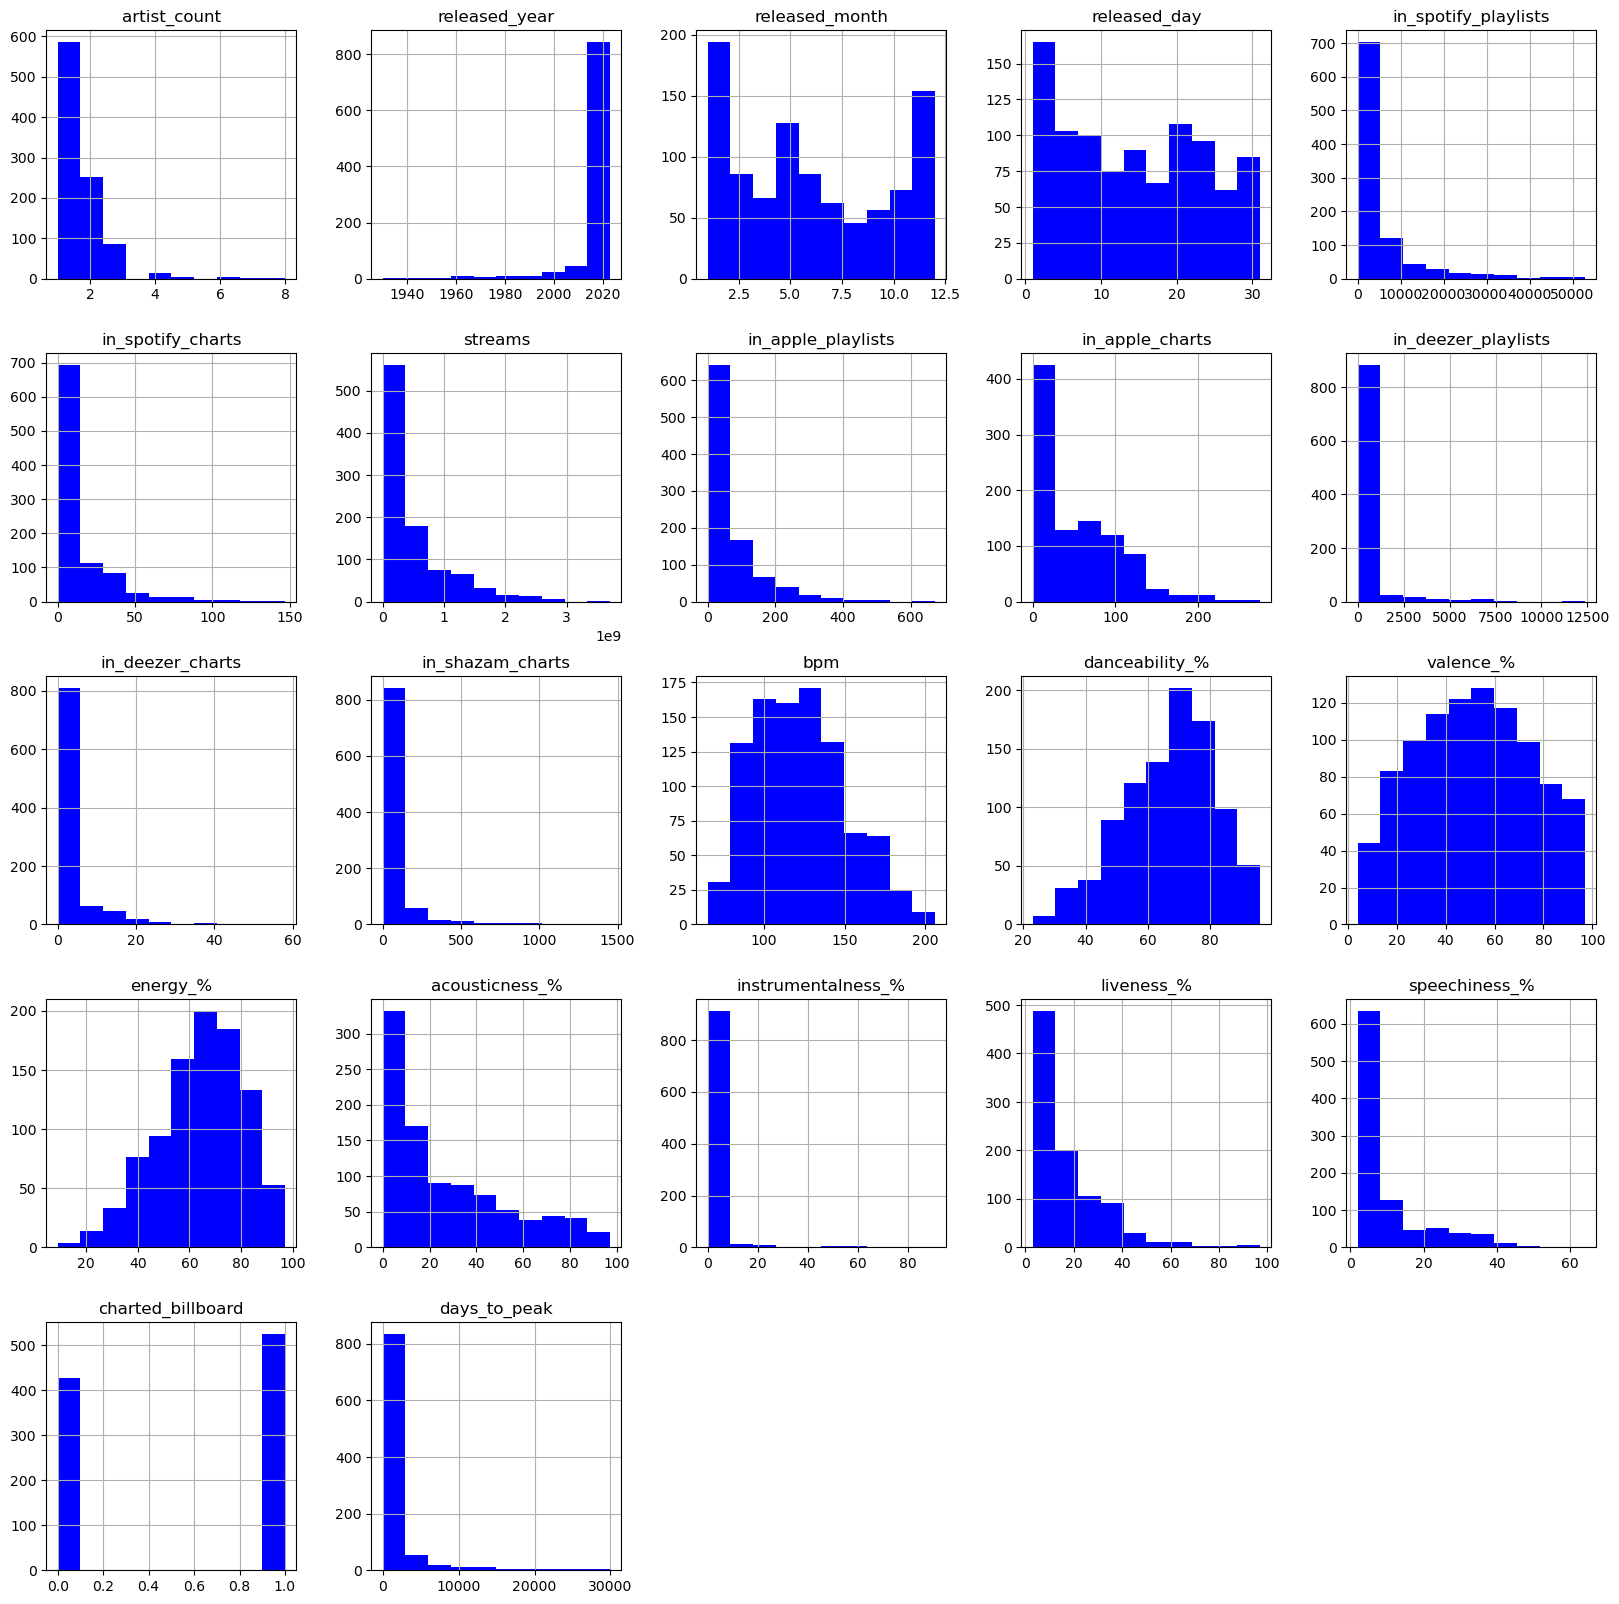

In [118]:

spotify_df.hist(color='blue',figsize=(20,20)) # checking the distributions of all variables

In [5]:
# define predictor (X1) and target (y1) columns
# Target variable
y1cols = ['charted_billboard']

# Predictor variables
X1cols = [
    'in_spotify_playlists',
    'in_spotify_charts',
    'streams',
    'in_apple_playlists',
    'in_apple_charts',
    'in_deezer_playlists',
    'in_deezer_charts',
    'in_shazam_charts',
    'bpm',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%',
    'artist_count',
    'days_to_peak'
]


In [40]:
X1 = spotify_df[X1cols]
y1 = spotify_df[y1cols]

In [123]:
X1.describe()

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_count,days_to_peak
count,951.000000,951.000000,9.510000e+02,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,5203.156677,12.031546,5.142840e+08,67.852787,51.920084,385.407992,2.665615,56.963197,122.539432,66.973712,51.374343,64.310200,27.007361,1.584648,18.219769,10.144059,1.556257,1550.920084
std,7905.537130,19.590520,5.671372e+08,86.515039,50.637971,1131.667039,6.040361,157.587228,28.080978,14.635370,23.471881,16.529829,25.921683,8.418334,13.724548,9.919214,0.893686,3925.972770
min,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000
25%,874.000000,0.000000,1.415514e+08,13.000000,7.000000,13.000000,0.000000,0.000000,99.500000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,1.000000,46.000000
50%,2209.000000,3.000000,2.902286e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,1.000000,296.000000
75%,5605.500000,16.000000,6.739369e+08,88.000000,86.500000,164.000000,2.000000,33.500000,140.500000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,2.000000,859.500000
max,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,8.000000,29935.000000


<Axes: >

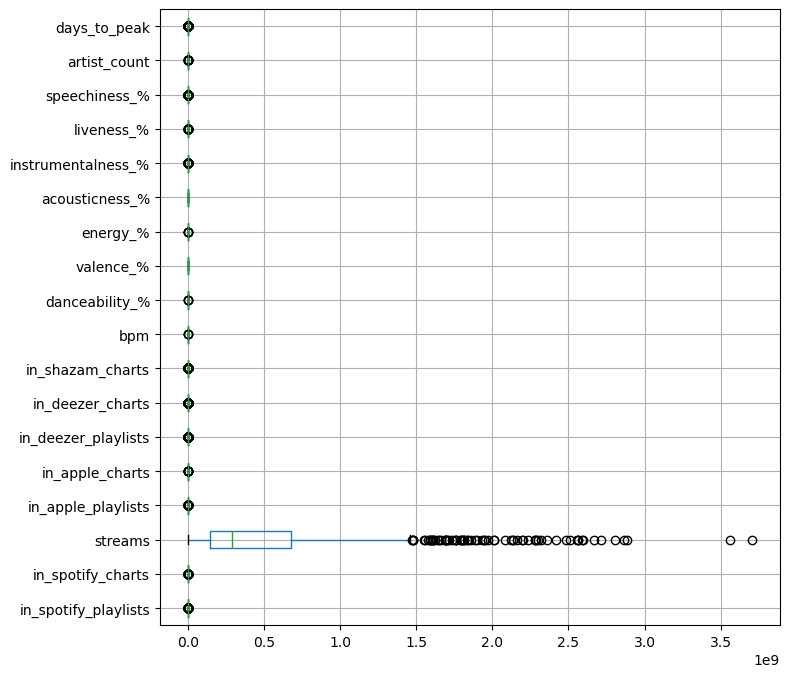

In [126]:
# pulls out only numeric data columns - in case there were any non-numeric ones
numeric_data = X1.select_dtypes(include=[np.number])
numeric_data.boxplot(vert=False,figsize=(8,8))

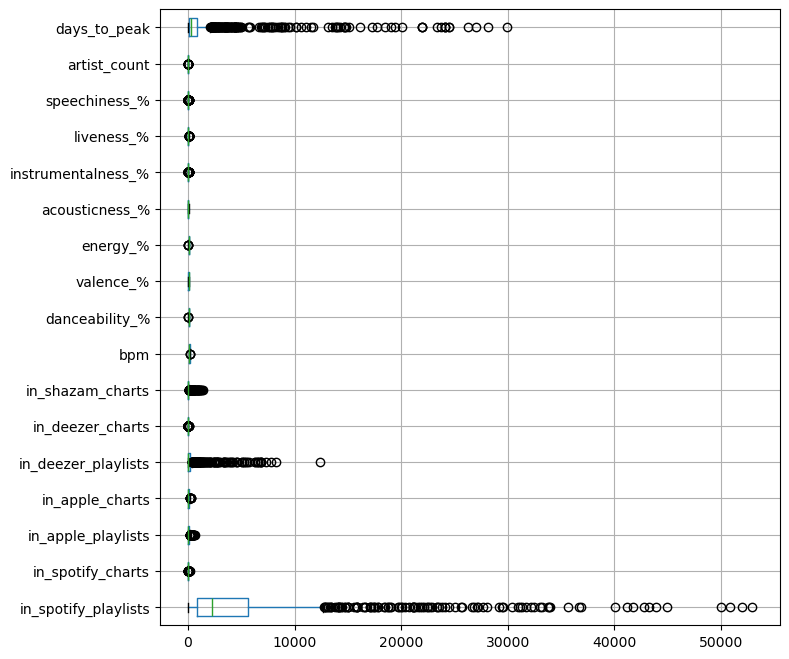

In [127]:
numeric_data_small = numeric_data[numeric_data.columns[numeric_data.columns!='streams']]
numeric_data_small.boxplot(vert=False,figsize=(8,8))
plt.show()

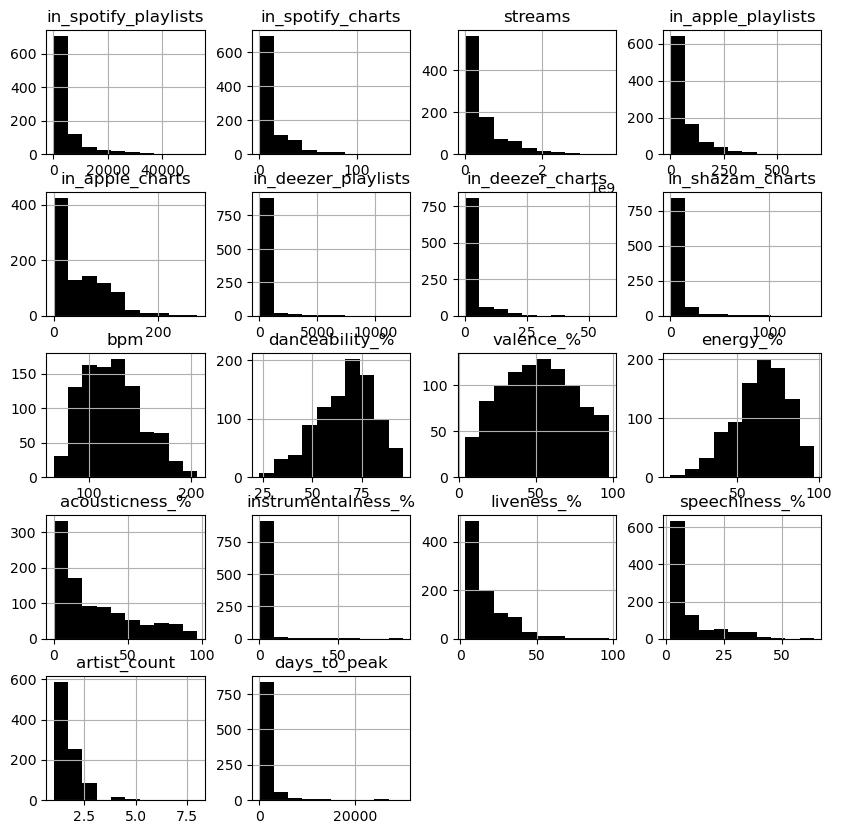

In [119]:
X1.hist(color='black',figsize=(10,10))
plt.show()

/opt/anaconda3/envs/envGEOG0178/lib/python3.12/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


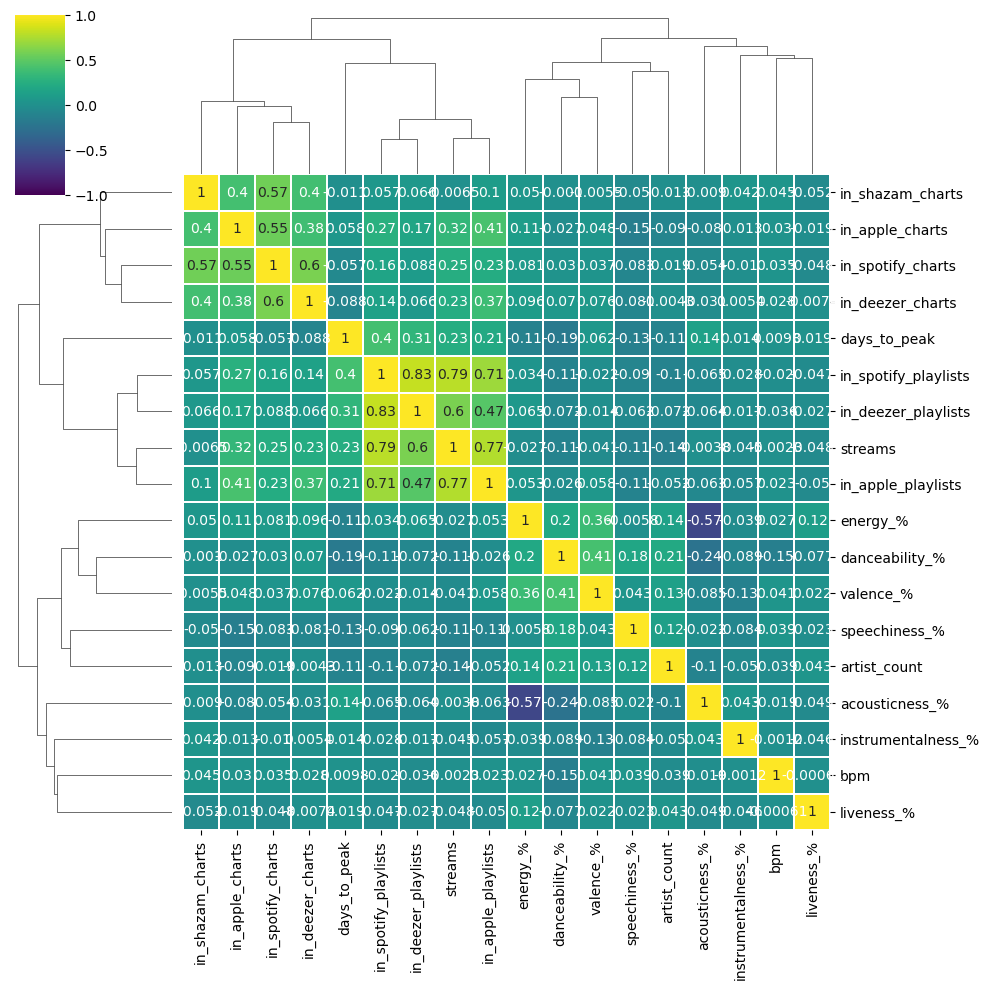

In [122]:
# calculate correlation matrix between all variables. Defaults to Pearson's r correlation
corr = X1.corr()

# hierarchically-clustered heatmap of correlation matrix to understand the association between variables
sns.clustermap(corr, center=0,cmap=plt.get_cmap('viridis'),
            square=True, linewidths=.05, annot=True, vmin=-1, vmax=1) 
plt.show()

<Axes: ylabel='charted_billboard'>

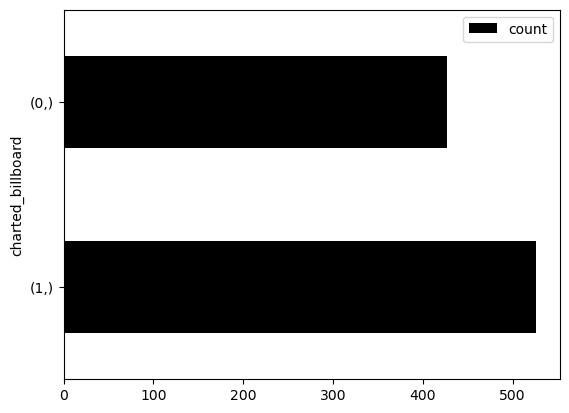

In [26]:
pd.DataFrame(y1.value_counts()).plot(kind='barh',color='black')

In [42]:
# splitting the dataset (both x- and y-variables) into the training and test sets
(X1_train, X1_test, y1_train, y1_test) = train_test_split(X1, y1, train_size=0.66, random_state=1)

The out of sample test accuracy is : 0.657


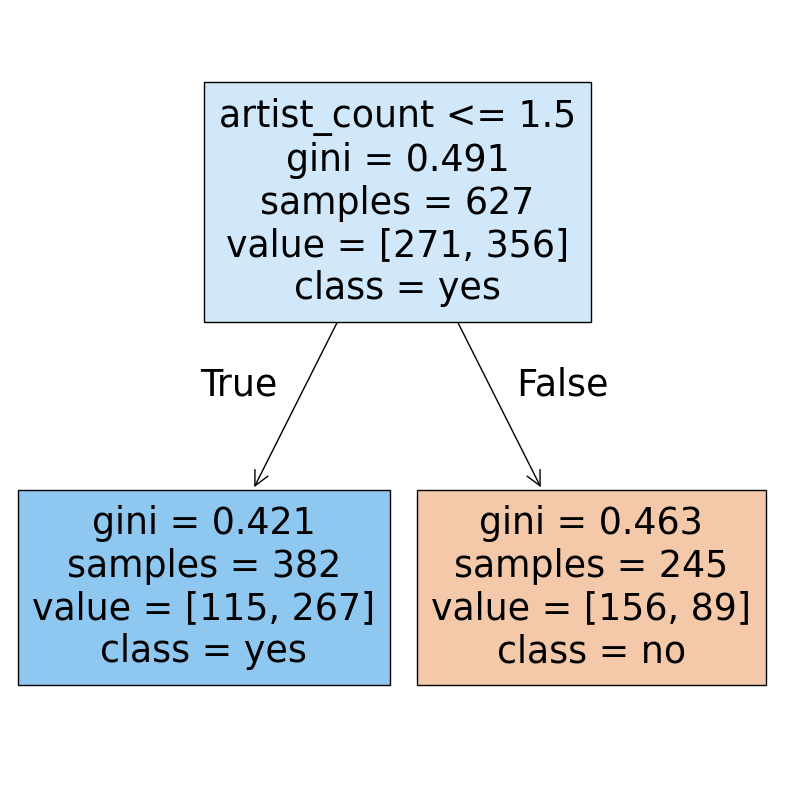

In [43]:
# creates a decision tree model; parameter is specified within the parentheses
tree = DecisionTreeClassifier(max_depth=1)
# fits the model using the training dataset
tree.fit(X1_train, y1_train)
# reports the prediction accuracy of the testset
y1_pred = tree.predict(X1_test)
print ('The out of sample test accuracy is : '+ str(round(accuracy_score(y1_test, y1_pred),3)))

# plots the decision tree model we fitted above
plt.figure(figsize=(10,10))
plot_tree(tree, filled=True, class_names=list(["no", "yes"]), feature_names=X1cols)
plt.show()

In [45]:
print(textDecisionTree(tree))

node=0 test node: go to node 1 if 16 <= 1.5 else to node 2
  node=1 leaf node: [[np.float64(0.301), np.float64(0.699)]]
  node=2 leaf node: [[np.float64(0.637), np.float64(0.363)]]


In [46]:
y1_pred=tree.predict(X1_test)
pd.concat([y1_test.reset_index(drop=True),pd.DataFrame(y1_pred,columns=['pred'])],axis=1).head(n=20) # gluing predictions to actual observations

,charted_billboard,pred
0,0,1
1,1,1
2,0,0
3,0,1
4,0,0
5,0,1
6,1,0
7,1,1
8,0,0
9,1,0


In [67]:
# let's produce a confusion matrix for the first decision tree model
ConfusionMatrixDisplay.from_estimator(tree, X1_test, y1_test)

In [52]:
# Produce a classification report to confirm the score for predictor
y1_pred=tree.predict(X1_test)
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.68      0.53      0.60       155
           1       0.64      0.78      0.70       169

    accuracy                           0.66       324
   macro avg       0.66      0.65      0.65       324
weighted avg       0.66      0.66      0.65       324



In [56]:
# re-creates the model
tree_v2 = DecisionTreeClassifier(max_depth=2)
# fits to training dataset
tree_v2.fit(X1_train, y1_train)
# reports the prediction accuracy of the testset
y1_pred = tree_v2.predict(X1_test)
print ('the out of sample test accuracy is : '+ str(round(accuracy_score(y1_test, y1_pred),3)))

the out of sample test accuracy is : 0.63


In [55]:
ConfusionMatrixDisplay.from_estimator(tree_v2, X1_test, y1_test)
y1_pred=tree_v2.predict(X1_test)
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.68      0.49      0.57       155
           1       0.63      0.79      0.70       169

    accuracy                           0.65       324
   macro avg       0.65      0.64      0.63       324
weighted avg       0.65      0.65      0.64       324



In [58]:
# random forest model
RF =  RandomForestClassifier() 
RF.fit(X1_train, y1_train)
print ('The out of sample test accuracy for a RandomForestClassifier is : '+ str(round(accuracy_score(y1_test, y1_pred),3)))

The out of sample test accuracy for a RandomForestClassifier is : 0.63


/opt/anaconda3/envs/envGEOG0178/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [60]:
# KFold Cross Validation
param_grid = {
    'max_depth': [10, 40],
    'n_estimators': [100] #, 200, 300] # restricted the grid search to reduce compute time 
}
# Create a based model
model = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3 # number of folds for cross validation
                           , n_jobs = -1 # use all processors
                            , verbose = 2 # what to display
                          )


In [61]:
grid_search.fit(X1_train, y1_train)
model = grid_search.best_estimator_
y2_pred=model.predict(X1_test)
print ('The out of sample test accuracy for a RandomForestClassifier is : '+ str(round(accuracy_score(y1_test, y2_pred),3)))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/anaconda3/envs/envGEOG0178/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/envGEOG0178/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/envGEOG0178/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/envGEOG0178/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 

[CV] END .....................max_depth=10, n_estimators=100; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.1s
[CV] END .....................max_depth=40, n_estimators=100; total time=   0.1s
[CV] END .....................max_depth=40, n_estimators=100; total time=   0.1s
[CV] END .....................max_depth=40, n_estimators=100; total time=   0.1s
The out of sample test accuracy for a RandomForestClassifier is : 0.701


In [62]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 40, 'n_estimators': 100}


In [ ]:
# Feature Importance

def plot_feature_importance(importance,names,model_type):
#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

/opt/anaconda3/envs/envGEOG0178/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


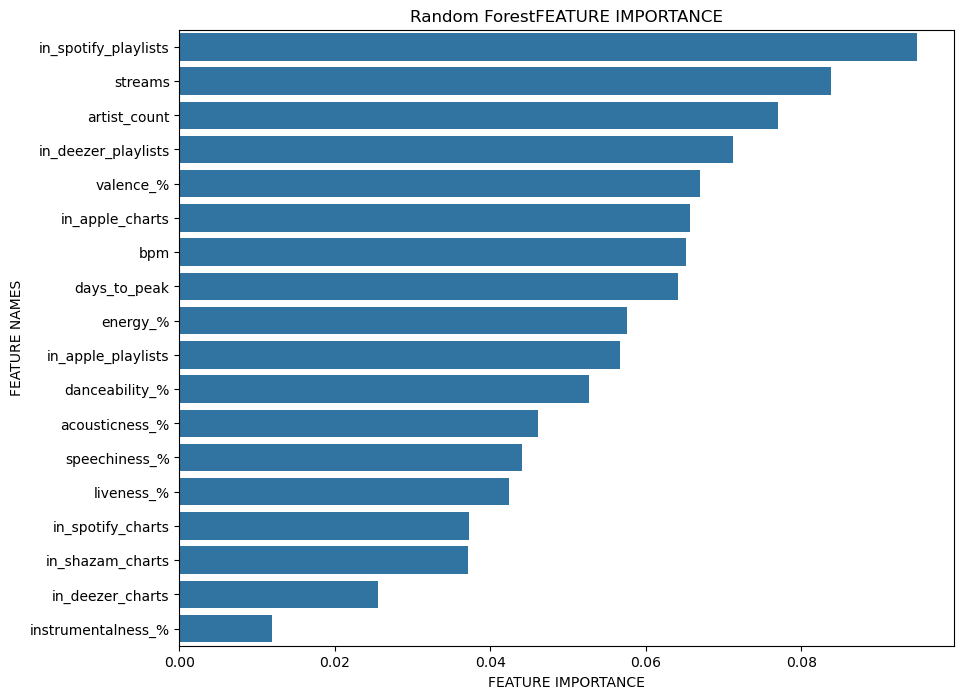

In [78]:
# feature importance plot
model.fit(X1_train, y1_train) 
plot_feature_importance(model.feature_importances_, X1_train.columns, 'Random Forest')
